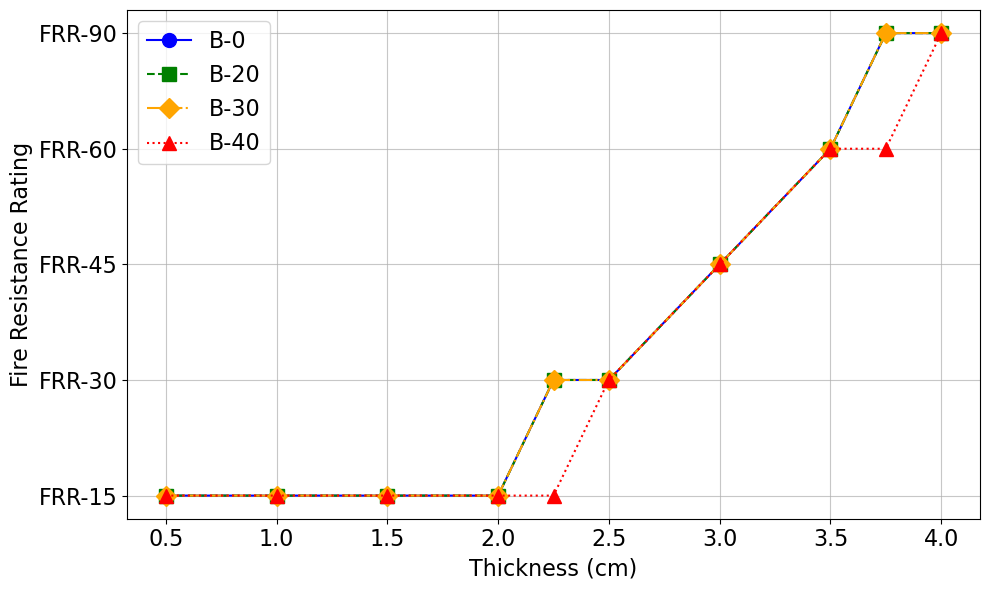

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el DataFrame directamente
data = {
    'Thickness (cm)': [0.50, 1.00, 1.50, 2.00, 2.25, 2.50, 3.00, 3.50, 3.75, 4.00],
    'B-0': ['FRR-15', 'FRR-15', 'FRR-15', 'FRR-15', 'FRR-30', 'FRR-30', 'FRR-45', 'FRR-60', 'FRR-90', 'FRR-90'],
    'B-20': ['FRR-15', 'FRR-15', 'FRR-15', 'FRR-15', 'FRR-30', 'FRR-30', 'FRR-45', 'FRR-60', 'FRR-90', 'FRR-90'],
    'B-30': ['FRR-15', 'FRR-15', 'FRR-15', 'FRR-15', 'FRR-30', 'FRR-30', 'FRR-45', 'FRR-60', 'FRR-90', 'FRR-90'],
    'B-40': ['FRR-15', 'FRR-15', 'FRR-15', 'FRR-15', 'FRR-15', 'FRR-30', 'FRR-45', 'FRR-60', 'FRR-60', 'FRR-90']
}

df = pd.DataFrame(data)

# Crear un mapeo de las clases categóricas a valores numéricos para graficar
frr_classes = pd.concat([df['B-0'], df['B-20'], df['B-30'], df['B-40']]).unique()
frr_mapping = {frr: i for i, frr in enumerate(sorted(frr_classes))}

# Convertir las columnas categóricas a numéricas usando el mapeo
df_numeric = df.copy()
for column in ['B-0', 'B-20', 'B-30', 'B-40']:
    df_numeric[column] = df[column].map(frr_mapping)

# Estilos para las curvas
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^']
colors = ['blue', 'green', 'orange', 'red']
ms = [10, 10, 10, 10]

# Crear el gráfico
plt.figure(figsize=(10, 6))
for column, label, style, marker, color, ms in zip(
    ['B-0', 'B-20', 'B-30', 'B-40'], 
    ['B-0', 'B-20', 'B-30', 'B-40'], 
    line_styles, markers, colors, ms):
    plt.plot(df['Thickness (cm)'], df_numeric[column], label=label, linestyle=style, marker=marker, color=color, ms = ms)

# Personalización del gráfico
plt.xticks(fontsize=16)
plt.yticks(ticks=range(len(frr_mapping)), labels=list(frr_mapping.keys()), fontsize=16)
plt.xlabel('Thickness (cm)', fontsize=16)
plt.ylabel('Fire Resistance Rating', fontsize=16)
plt.title('', fontsize=14)
plt.legend(title="", fontsize=16)
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()